In [1]:
# Load the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving Optimal_Base.csv to Optimal_Base.csv


In [2]:
import pandas as pd

In [4]:
# Read data from a CSV file into a data frame
df = pd.read_csv('Optimal_Base.csv')
df = df.drop(columns='Partition')

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9                  0.167                         -1   
1           1     0.9                  0.167                         -1   
2           1     0.9                  0.167                         -1   
3           1     0.9                  0.167                         -1   
4           1     0.9                  0.167                         -1   
5           1     0.9                  0.167                         -1   
6           1     0.9                  0.167                         -1   
7           1     0.9                  0.167                         -1   
8           1     0.9                  0.167                         -1   
9           1     0.9                  0.167                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50               0.021   
1                            88     

In [5]:
# Drop 'device_fraud_count' since it contains the same value for all
rvar_list =['device_fraud_count']
df_sample1 = df.drop(columns=rvar_list)

In [6]:
# Separate all the variables into two lists for future column indexing
# One for numerical, the other for categorical (12 categorical + 19 numerical)
cvar_list = ['fraud_bool', 'payment_type', 'employment_status', 'email_is_free',
 'housing_status', 'phone_home_valid',
 'phone_mobile_valid', 'has_other_cards',
 'foreign_request', 'source',
 'device_os', 'keep_alive_session']
nvar_list = ['income', 'name_email_similarity', 'prev_address_months_count',
 'current_address_months_count', 'customer_age', 'days_since_request',
 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_distinct_emails_8w', 'month']

# Get the unique values of each categorical variables in the data frame
def column_unique_values(x_column):
  return list(x_column.unique())

df_sample1[cvar_list].apply(column_unique_values)

fraud_bool                                             [1, 0]
payment_type                             [AA, AB, AC, AD, AE]
employment_status                [CA, CB, CC, CD, CE, CF, CG]
email_is_free                                          [0, 1]
housing_status                   [BA, BB, BC, BD, BE, BF, BG]
phone_home_valid                                       [1, 0]
phone_mobile_valid                                     [0, 1]
has_other_cards                                        [0, 1]
foreign_request                                        [0, 1]
source                                    [INTERNET, TELEAPP]
device_os             [windows, other, linux, macintosh, x11]
keep_alive_session                                     [0, 1]
dtype: object

In [7]:
# Standardize the numerical variables 
df_sample2 = df_sample1.copy()
df_sample2[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.
df_sample4 = df_sample3.copy()
df_sample4 = pd.get_dummies(df_sample3, prefix_sep='-')
print(df_sample4.columns.values)

['income' 'name_email_similarity' 'prev_address_months_count'
 'current_address_months_count' 'customer_age' 'days_since_request'
 'intended_balcon_amount' 'zip_count_4w' 'velocity_6h' 'velocity_24h'
 'velocity_4w' 'bank_branch_count_8w' 'date_of_birth_distinct_emails_4w'
 'credit_risk_score' 'bank_months_count' 'proposed_credit_limit'
 'session_length_in_minutes' 'device_distinct_emails_8w' 'month'
 'fraud_bool-0' 'fraud_bool-1' 'payment_type-AA' 'payment_type-AB'
 'payment_type-AC' 'payment_type-AD' 'payment_type-AE'
 'employment_status-CA' 'employment_status-CB' 'employment_status-CC'
 'employment_status-CD' 'employment_status-CE' 'employment_status-CF'
 'employment_status-CG' 'email_is_free-0' 'email_is_free-1'
 'housing_status-BA' 'housing_status-BB' 'housing_status-BC'
 'housing_status-BD' 'housing_status-BE' 'housing_status-BF'
 'housing_status-BG' 'phone_home_valid-0' 'phone_home_valid-1'
 'phone_mobile_valid-0' 'phone_mobile_valid-1' 'has_other_cards-0'
 'has_other_cards-1' 'f

In [8]:
# Remove the redundant dummies (Step 2 of dummy coding)
rdummies = ['fraud_bool-0','payment_type-AA',
 'employment_status-CA', 'email_is_free-0',
 'housing_status-BA', 'phone_home_valid-0',
 'phone_mobile_valid-0', 'has_other_cards-0',
 'foreign_request-0',
 'source-INTERNET', 'device_os-linux',
 'keep_alive_session-0']
df_sample5 = df_sample4.copy()
df_sample5 = df_sample4.drop(columns=rdummies)

# Get the remaining variable list after the variable transformation
print(df_sample5.columns.values)

['income' 'name_email_similarity' 'prev_address_months_count'
 'current_address_months_count' 'customer_age' 'days_since_request'
 'intended_balcon_amount' 'zip_count_4w' 'velocity_6h' 'velocity_24h'
 'velocity_4w' 'bank_branch_count_8w' 'date_of_birth_distinct_emails_4w'
 'credit_risk_score' 'bank_months_count' 'proposed_credit_limit'
 'session_length_in_minutes' 'device_distinct_emails_8w' 'month'
 'fraud_bool-1' 'payment_type-AB' 'payment_type-AC' 'payment_type-AD'
 'payment_type-AE' 'employment_status-CB' 'employment_status-CC'
 'employment_status-CD' 'employment_status-CE' 'employment_status-CF'
 'employment_status-CG' 'email_is_free-1' 'housing_status-BB'
 'housing_status-BC' 'housing_status-BD' 'housing_status-BE'
 'housing_status-BF' 'housing_status-BG' 'phone_home_valid-1'
 'phone_mobile_valid-1' 'has_other_cards-1' 'foreign_request-1'
 'source-TELEAPP' 'device_os-macintosh' 'device_os-other'
 'device_os-windows' 'device_os-x11' 'keep_alive_session-1']


In [9]:
from sklearn.model_selection import train_test_split

# test_size specifies the percentage for the test partition
df4partition = df_sample5
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

In [10]:
# Create a user-defined function, profit_calcuation, that calcuates the profit over a dataset 
# for which we know the actual class (e.g., fraud/not-fraud) from y_value
# and the predictors values (e.g. income, customer_age) from x_value
# using the probability prediction model carried by the model object model.

def profit_calculation(model, x_value, y_value):
  
    # Specify the decision cut-off used in the decision rule
    d_cutoff = 1/24

    # Get the decisions made by the decision rule for each observation in the dataset
    # The method predict_proba is to get the predicted probability
    # Then we compare the predicted probabilities with the decision cut-off d_cutoff
    # True means DETECTED, False means NOT DETECTED
    # list() is to convert the results into a Python list
    decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  
    # We put the actual class into a Python list called y
    y = list(y_value)
  
    # Get the number of observations of the dataset and put it into n_obs
    n_obs = len(y)

    # cum_profit is for cumulating the profit during the for-loop
    cum_profit = 0

    for i in range(n_obs): # i will go from 0 to (n_obs-1)
        if decision[i] == True and y[i] == 1: # if the decision is DETECTED and the actual class is 1 (FRAUD) for the i-th observation
            profit = 2000 # the net profit is 2000
        elif decision[i] == True and y[i] == 0: # if the decision is DETECTED and the actual class is 0 (NON-FRAUD) for the i-th observation
            profit = -100 # the net profit is -100
        elif decision[i] == False and y[i] == 1: # if the decision is NOT-DETECTED and the actual class is 1 (FRAUD) for the i-th observation
            profit = -500 # the net profit is -500
        else:
            profit = 0 # For any other situation, the net profit is zero
        cum_profit = cum_profit + profit # cumulating the profit
  
    average_net_profit = cum_profit / n_obs # Derive the average net profit
    return average_net_profit # return the average net profit

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Separate the predictor values and the DV values into X and y respectively
DV = 'fraud_bool-1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
    dot_data = StringIO()
    export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    output_imagefile = 'tree.png'
    graph.write_png(output_imagefile)
    return output_imagefile

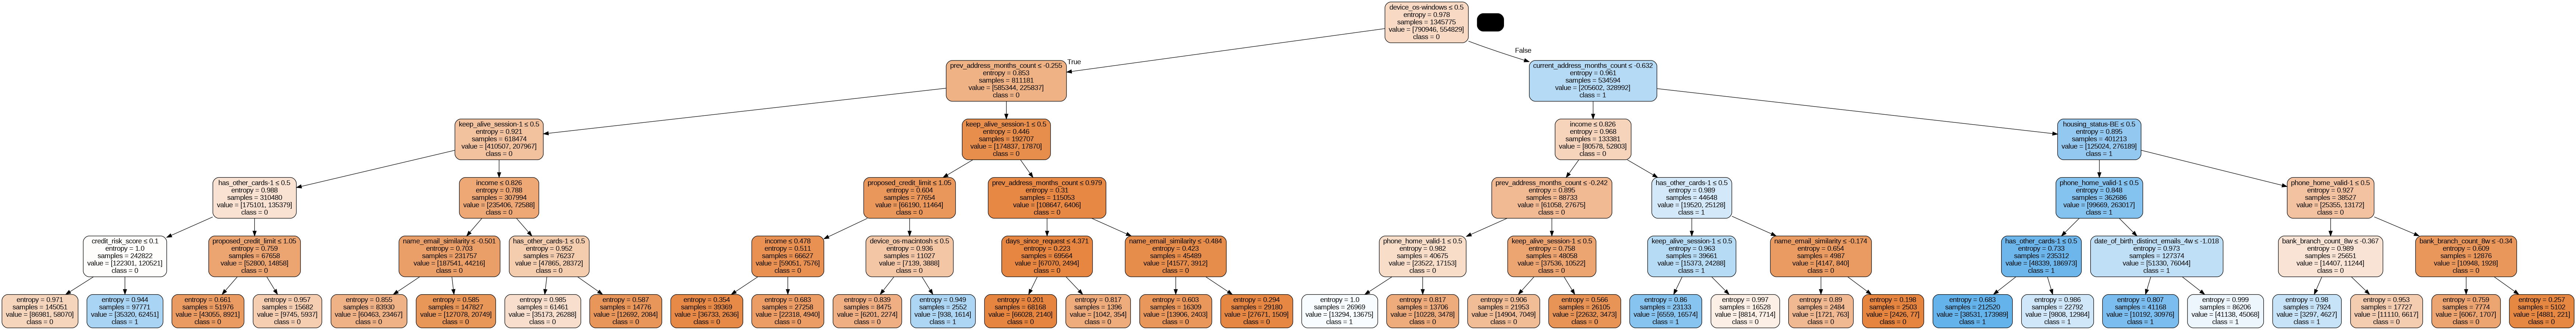

In [12]:
# Run Classification tree with k-fold cross validation with k=5
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 5
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

# Set n_jobs to be -1 to run on all CPU cores.
# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case roc_auc - returns.

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

In [13]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

5
0.8084199712065911
